In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\Data Sets\taxi_trip_pricing.csv")
data = data.dropna()
data.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914


In [23]:
X = data[
    [
        "Trip_Distance_km",
        "Passenger_Count",
        "Base_Fare",
        "Per_Km_Rate",
        "Per_Minute_Rate",
        "Trip_Duration_Minutes",
    ]
]
y = data["Trip_Price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

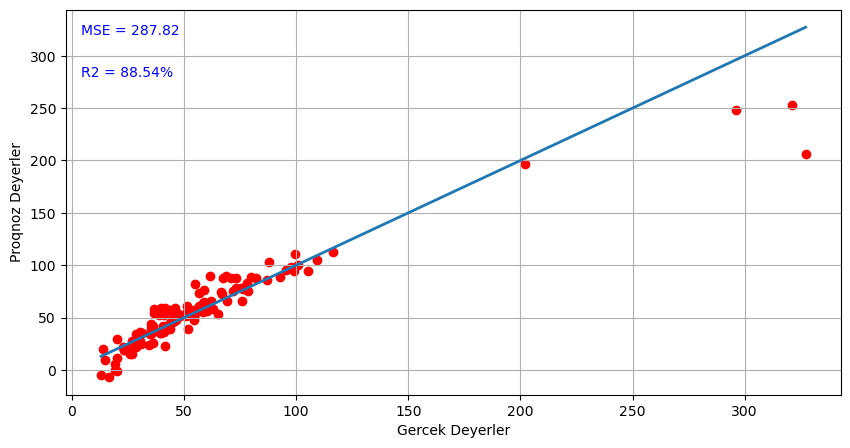

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred, color = 'r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],linewidth=2)
plt.text(4, 320,f"MSE = {mse:.2f}", color ='b')
plt.text(4,280, f"R2 = {r2 *100:.2f}%", color ='b' )
plt.xlabel("Gercek Deyerler")
plt.ylabel("Proqnoz Deyerler")
plt.grid()
